In [1]:
import tensorflow as tf
import h5py
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import scipy
tf.__version__

'1.15.0'

# 手写汉字数字的识别

## 数据集的构建
  这里我所找到的数据集是从一到十总共800张图片，然后我用50张图片作为测试集，用CNN来进行训练预测

In [2]:
# 未处理图片的位置
orig_pictures = r'RawData'

# 已处理的图片存储位置
gen_pictures = r'CompletedData'

In [3]:
# 查询需要分类的类别以及样本的总数
classes = ["one","two","three","four",
            "five","six","seven","eight","nine","ten"]

In [4]:
def get_traindate(orig_dir, gen_dir, classes):
    i = 0
    for index, name in enumerate(classes):
        class_path = orig_dir + '\\' + name + '\\'  # 扫描原始的图片
        gen_train_path = gen_dir + '\\' + name  # 判断是否有文件夹
        folder = os.path.exists(gen_train_path)
        
        if not folder:
            os.makedirs(gen_train_path)
            print(gen_train_path, "new file")
        else:
            print("There is the file")
        
        # 给图片加编号保存
        for imagename_dir in os.listdir(class_path):
            i += 1
            origimage_path = class_path + imagename_dir
            # 统一格式
            image_data = Image.open(origimage_path).convert('RGB')
            image_date = image_data.resize((64, 64))
            image_data.save(gen_train_path + '\\' + name + str(i) + '.jpg')
            num_samples = i
    
    print('picture : %d' % num_samples)

In [5]:
get_traindate(orig_pictures, gen_pictures, classes)

CompletedData\one new file
CompletedData\two new file
CompletedData\three new file
CompletedData\four new file
CompletedData\five new file
CompletedData\six new file
CompletedData\seven new file
CompletedData\eight new file
CompletedData\nine new file
CompletedData\ten new file
picture : 800


In [6]:
one = []
label_one = []
two = []
label_two = []
three = []
label_three = []
four = []
label_four = []
five = []
label_five = []
six = []
label_six = []
seven = []
label_seven = []
eight = []
label_eight = []
nine = []
label_nine = []
ten = []
label_ten = []

In [7]:
def get_files(file_dir):
    for file in os.listdir(file_dir + '\\' + 'one'):
        one.append(file_dir + '\\' + 'one' + '\\' + file)
        label_one.append(0)
    for file in os.listdir(file_dir + '\\' + 'two'):
        one.append(file_dir + '\\' + 'two' + '\\' + file)
        label_two.append(1)
    for file in os.listdir(file_dir + '\\' + 'three'):
        one.append(file_dir + '\\' + 'three' + '\\' + file)
        label_three.append(2)
    for file in os.listdir(file_dir + '\\' + 'four'):
        one.append(file_dir + '\\' + 'four' + '\\' + file)
        label_four.append(3)
    for file in os.listdir(file_dir + '\\' + 'five'):
        one.append(file_dir + '\\' + 'five' + '\\' + file)
        label_five.append(4)
    for file in os.listdir(file_dir + '\\' + 'six'):
        one.append(file_dir + '\\' + 'six' + '\\' + file)
        label_six.append(5)
    for file in os.listdir(file_dir + '\\' + 'seven'):
        one.append(file_dir + '\\' + 'seven' + '\\' + file)
        label_seven.append(6)
    for file in os.listdir(file_dir + '\\' + 'eight'):
        one.append(file_dir + '\\' + 'eight' + '\\' + file)
        label_eight.append(7)
    for file in os.listdir(file_dir + '\\' + 'nine'):
        one.append(file_dir + '\\' + 'nine' + '\\' + file)
        label_nine.append(8)
    for file in os.listdir(file_dir + '\\' + 'ten'):
        one.append(file_dir + '\\' + 'ten' + '\\' + file)
        label_ten.append(9)
    
    #把所有数据集进行合并
    image_list = np.hstack((one,two,three,four,five,six,seven,eight,nine,ten))
    label_list = np.hstack((label_one,label_two,label_three,label_four,label_five,label_six,label_seven,label_eight,label_nine,label_ten))
    
    #利用shuffle打乱顺序
    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    np.random.shuffle(temp)
    
    #从打乱的temp中再取出list（img和lab）
    image_list = list(temp[:,0])
    label_list = list(temp[:,1])
    label_list = [int(i) for i in label_list] 

    return image_list,label_list

In [8]:
train_dir = r'C:\Users\Zyi\Desktop\NJU\Data\Completed Data'
image_list,label_list = get_files(train_dir)
Train_image =  np.random.rand(len(image_list)-50, 64, 64, 3).astype('float32')
#这里50为测试集，根据需求改
Train_label = np.random.rand(len(image_list)-50, 1).astype('int')
 
Test_image =  np.random.rand(50, 64, 64, 3).astype('float32')
Test_label = np.random.rand(50, 1).astype('int')
for i in range(len(image_list)-50):
    Train_image[i] = np.array(plt.imread(image_list[i]))
    Train_label[i] = np.array(label_list[i])
 
for i in range(len(image_list)-50, len(image_list)):
    Test_image[i+50-len(image_list)] = np.array(plt.imread(image_list[i]))
    Test_label[i+50-len(image_list)] = np.array(label_list[i])

f = h5py.File('data.h5', 'w')
f.create_dataset('X_train', data=Train_image)
f.create_dataset('y_train', data=Train_label)
f.create_dataset('X_test', data=Test_image)
f.create_dataset('y_test', data=Test_label)
f.close()
#文件生成在此py文件同一文件夹下


  这样我们的数据集就构建好啦，下面可以开始用CNN来进行训练和预测了

In [9]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from PIL import Image
from scipy import ndimage
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)
print(tf.__version__)

1.15.0


In [10]:
# 载入刚才制作的h5数据集
train_dataset = h5py.File('data.h5', 'r')
X_train_orig = np.array(train_dataset['X_train'][:])
Y_train_orig = np.array(train_dataset['y_train'][:])
X_test_orig = np.array(train_dataset['X_test'][:])
Y_test_orig = np.array(train_dataset['y_test'][:])

# 归一化
X_train = X_train_orig / 255
X_test = X_test_orig / 255

y = 7


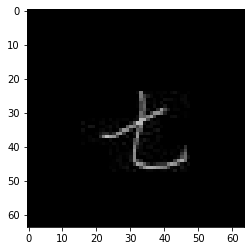

In [11]:
# 看看数据集的样子
t = 5
plt.imshow(X_train[t])
# 这里最后要加一是因为数据集是一到十，标记的时候我们用0到9，所以这里手动加一
print("y = " + str(np.squeeze(Y_train_orig[t] + 1)))

In [12]:
# 再确认一下数据集的大小
Y_train_orig = Y_train_orig.T
Y_test_orig = Y_test_orig.T
# 转成one-hot类型编码
Y_train = convert_to_one_hot(Y_train_orig, 10).T
Y_test = convert_to_one_hot(Y_test_orig, 10).T

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

conv_layers = {}
print(Y_train[5])

number of training examples = 750
number of test examples = 50
X_train shape: (750, 64, 64, 3)
Y_train shape: (750, 10)
X_test shape: (50, 64, 64, 3)
Y_test shape: (50, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
# 开始构建卷积层
# 四个参数分别代表卷积核的高、宽、通道数以及output的数量(即1-10十种情况)
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, shape = [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape = [None, n_y])
    
    return X, Y

In [14]:
X, Y = create_placeholders(64, 64, 3, 10)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [15]:
# 初始化我们的卷积核中的参数大小
# 这里我们采用两层卷积加上一层全连接的结构
def initialize_parameters():
    tf.set_random_seed(1)
    
    # 第一层卷积层，4x4x3，数量为8
    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    # 第二层卷积层，2x2x8，数量为16
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    # 全连接层，128x10的大小
    W3 = tf.get_variable("W4", [64, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3}
    
    return parameters

In [16]:
tf.reset_default_graph()
# 让我们来看看我们卷积核的样子
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    # 变量的初始化
    sess_test.run(init)
    print(parameters["W1"])
    print(parameters["W2"])
    print(parameters["W3"])
    
    print()
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))
    print("W3 = " + str(parameters["W3"].eval()[1,1]))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

<tf.Variable 'W1:0' shape=(4, 4, 3, 8) dtype=float32_ref>
<tf.Variable 'W2:0' shape=(2, 2, 8, 16) dtype=float32_ref>
<tf.Variable 'W4:0' shape=(64, 10) dtype=float32_ref>

W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
W3 = 0.2011595


In [17]:
# 正向传播

def forward_propagation(X, parameters):
    """
    这里我们训练的流程是:卷积 -> RELU -> MAXPOOL -> 卷积 -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNETED
    
    参数:X是输入层输送进来的数据，parameters是隐藏层中卷积核和全连接W矩阵的参数，提前设置好
    Return：output layer ：Z3
    """
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    # 第一层卷积
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding="SAME")
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")
    # 第二层卷积
    # 经过第一层的卷积+池化，现在的图片大小为8x8x8
    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding="SAME")
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1], strides=[1,4,4,1], padding="SAME")
    # 经过第二层的卷积+池化，现在的图片大小是2x2x16
    
    # 将16个通道平铺成一个向量
    P2 = tf.contrib.layers.flatten(P2)
    # print("P2 shape: " + str(P2.shape))
    
    Z3 = tf.matmul(P2, W3)
    
    return Z3

In [18]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2, 64, 64, 3), Y: np.random.randn(2, 10)})
    print("Z3 = " + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Z3 = [[-3.6391187  -0.40035293  2.6781218  -1.1577153  -0.7321391  -2.0522006
   2.0173054  -3.4039555  -1.032423   -2.2833967 ]
 [-3.3136015  -0.23735599  2.5692573  -0.7910237  -0.24624008 -1.6117853
   1.7850629  -3.2946327  -1.1045173  -2.327226  ]]


## 实现代价函数
  softmax and reduce_mean

In [19]:
# 代价函数
def compute_cost(Z3, Y):
    cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z3, labels = Y)
    cost = tf.reduce_mean(cost)
    
    return cost

In [20]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4, 64, 64, 3), Y: np.random.randn(4, 10)})
    print("cost = " + str(a))

cost = 5.14554


In [21]:
# 建立CNN训练模型

def model(X_train, Y_train, X_test, Y_test, learning_rate=0.002,
          num_epochs=70, minibatch_size = 100, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (m, n_H0, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    costs = []
    
    # 占位符生成争取的shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    # 初始化参数
    parameters = initialize_parameters()
    # 正向传播
    Z3 = forward_propagation(X, parameters)
    # 计算代价函数
    cost = compute_cost(Z3, Y)
    
    # 选择优化器
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    # 初始化参数
    init = tf.global_variables_initializer()
    # 保存训练的数据
    saver = tf.train.Saver()
    # 记录当前时间用以计算训练所用的时间
    from time import time
    start_time = time()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed+1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, temp_cost = sess.run([optimizer, cost],
                                    feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
            
            if print_cost == True and epoch % 5 == 0:
                print("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
                
            # 保存参数
            if epoch == num_epochs-1:
                saver.save(sess, 'params.ckpt')
                
        # 画图
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()
        
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # 计算测试集的正确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy: ", train_accuracy)
        print("Test Accuracy: ", test_accuracy)
        
        duration = time() - start_time
        print("持续时间: {:.2f}".format(duration))
        
        return train_accuracy, test_accuracy, parameters

## 下面就可以开始训练我们的模型了

Cost after epoch 0: 2.634761
Cost after epoch 5: 2.382971
Cost after epoch 10: 1.399608
Cost after epoch 15: 0.710085
Cost after epoch 20: 0.471466
Cost after epoch 25: 0.364338
Cost after epoch 30: 0.291296
Cost after epoch 35: 0.240671
Cost after epoch 40: 0.203583
Cost after epoch 45: 0.180217
Cost after epoch 50: 0.151245
Cost after epoch 55: 0.137086
Cost after epoch 60: 0.123121
Cost after epoch 65: 0.110039


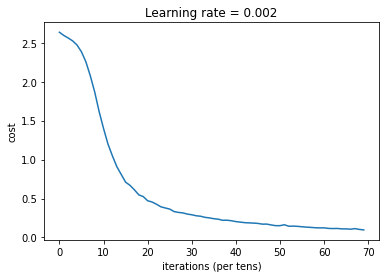

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy:  0.9853333
Test Accuracy:  0.96
持续时间: 16.22


In [22]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

## 模型小结
  其实这个模型还是有待优化的，训练出来的cost其实还是挺高的，但是在准确率上面已经足够高啦，不过调参数真的是一个好辛苦的过程...其实一开始我也有试过只用一个卷积层加一个全连接层来进行这次模型的训练，但是发现最后好像还是两层训练出来的准确度会稍微高一点，单纯的去掉第二层卷积其实反而让参数量变多了...尝试多次后我觉得还是这次的模型较为可以

## 使用训练好的模型来预测

259
INFO:tensorflow:Restoring parameters from params.ckpt
y = 4
[[-15.431677   -25.883556   -26.134432     9.610826     0.95422196
  -12.073983    -7.040877   -10.333881    -2.3618014   -7.231707  ]]
predict y = 4


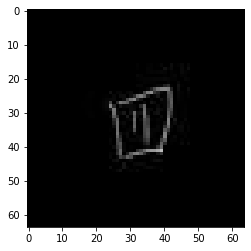

In [23]:
index = np.random.randint(0, 1559)
print(index)
tf.reset_default_graph()

# 进行预测
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 10)
    parameters = initialize_parameters()
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess, 'params.ckpt')
    
    parametses = {variables[0], variables[1], variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    X_from_trainset = X_train[index].astype(np.float32)
    X_from_trainset = np.reshape(X_from_trainset, [1,64,64,3])
    Y_from_trainset = Y_train[index]
    Y_from_trainset = np.reshape(Y_from_trainset, [1,10])
    
    plt.imshow(X_train_orig[index]/255)
    print("y = " + str(np.squeeze(Y_train_orig[:, index])+1))
    
    a = sess.run(predict_result, {X: X_from_trainset, Y: Y_from_trainset})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(np.squeeze(predict_class)+1))

再来试试测试集

37
INFO:tensorflow:Restoring parameters from params.ckpt
y = 5
[[ -9.64163    -9.190166   -7.1455536  -8.89494     2.7877991  -7.339204
   -5.2353463 -22.659061   -8.14128   -10.771293 ]]
predict y = 5


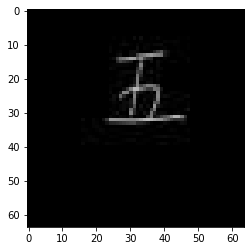

In [24]:
tf.reset_default_graph()
index = np.random.randint(0, 50)
print(index)

with tf.Session() as sess:
    X, Y = create_placeholders(64, 64, 3, 10)
    parameters = initialize_parameters()
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess, 'params.ckpt')
    
    parametses = {variables[0], variables[1], variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    X_from_testset = X_test[index].astype(np.float32)
    X_from_testset = np.reshape(X_from_testset, [1,64,64,3])
    Y_from_testset = Y_test[index]
    Y_from_testset = np.reshape(Y_from_testset, [1,10])
    
    plt.imshow(X_test_orig[index]/255)
    print("y = " + str(np.squeeze(Y_test_orig[:, index])+1))
    
    a = sess.run(predict_result, {X: X_from_testset, Y: Y_from_testset})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(np.squeeze(predict_class) + 1))

最后让我们传入一张不属于训练集中的图片来预测

INFO:tensorflow:Restoring parameters from params.ckpt
[[ -7.411972   -6.2518044   0.6225028 -30.846403   -3.0479827 -23.049612
   -1.4706249 -34.27453   -30.234184  -32.003307 ]]
predict y = [3]


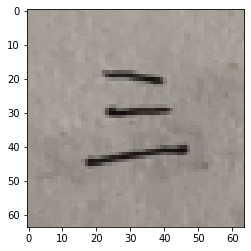

In [25]:
tf.reset_default_graph()

#load a picture taken by yourself
my_image = Image.open('my_three.png').convert('RGB')
my_image = my_image.resize((64,64))
# display this picture
plt.imshow(my_image)

#prepare data
X_my_image = np.array(my_image)/255. # normalization
X_my_image = X_my_image.astype(np.float32)
X_my_image = np.reshape(X_my_image,[1,64,64,3])

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    
    #initialize parameters
    init = tf.global_variables_initializer()
    sess.run(init)
    
    #restore parameters
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess,'params.ckpt')
    
    #predict
    parametses = {variables[0],variables[1],variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    #display predict result
    a = sess.run(predict_result, {X: X_my_image, Y: [[1,0,0,0,0,0]]})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(predict_class+1))

再试一张试试

INFO:tensorflow:Restoring parameters from params.ckpt
[[ -8.178726    -9.648932    -2.176549   -27.035858    -2.9643908
  -22.892422    -0.40961075 -28.254532   -23.636677   -27.5867    ]]
predict y = [7]


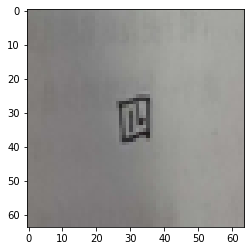

In [26]:
tf.reset_default_graph()

#load a picture taken by yourself
my_image = Image.open('my_four.jpg').convert('RGB')
my_image = my_image.resize((64,64))
# display this picture
plt.imshow(my_image)

#prepare data
X_my_image = np.array(my_image)/255. # normalization
X_my_image = X_my_image.astype(np.float32)
X_my_image = np.reshape(X_my_image,[1,64,64,3])

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    
    #initialize parameters
    init = tf.global_variables_initializer()
    sess.run(init)
    
    #restore parameters
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess,'params.ckpt')
    
    #predict
    parametses = {variables[0],variables[1],variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    #display predict result
    a = sess.run(predict_result, {X: X_my_image, Y: [[1,0,0,0,0,0]]})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(predict_class+1))

可以看到这次的预测就有了一点小偏差...因此模型还是有值得优化的地方的